# Limpieza de datos
En este notebook se incluye:

1. Tratamiento de valores faltantes

2. Conversión de tipos de datos

3. Identificación y gestión de duplicados

4. Detección y manejo de outliers

5. Eliminación de columnas innecesarias

6. Estandarización o normalización (si aplica)

7. Creación de nuevas variables

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_drugs = pd.read_excel("../data/data_drugs.xlsx", header =2)
df_drugs.tail(50)

,Country,Country code,Survey year,Prevalence (%),Substance,Recall period,Age,Sample size,Males (%),Females (%)
993,Sweden,SE,2021,0.7,Amphetamines,Last year,Adults (15-64),6562,0.9,0.6
994,Sweden,SE,2021,1.6,Amphetamines,Last year,Young adults (15-34),1928,1.8,1.5
995,Sweden,SE,2021,0.2,Amphetamines,Last month,Adults (15-64),6562,0.2,0.1
996,Sweden,SE,2021,0.4,Amphetamines,Last month,Young adults (15-34),1928,0.6,0.2
997,Sweden,SE,2021,0.8,Ecstasy,Last year,Adults (15-64),6562,0.9,0.8
998,Sweden,SE,2021,2.0,Ecstasy,Last year,Young adults (15-34),1928,2,2
999,Sweden,SE,2021,0.1,Ecstasy,Last month,Adults (15-64),6562,0.2,0.1
1000,Sweden,SE,2021,0.3,Ecstasy,Last month,Young adults (15-34),1928,0.5,0.2
1001,Sweden,SE,2021,85.3,Alcohol,Last year,Adults (15-64),6562,85.9,84.7
1002,Sweden,SE,2021,80.2,Alcohol,Last year,Young adults (15-34),1928,79.6,81.1


In [10]:
# comienzo unificando los nombres de las columnas para evitar problemas
df_drugs.columns = (df_drugs.columns.str.lower().str.replace(" ", "_"))

df_drugs.columns

Index(['country', 'country_code', 'survey_year', 'prevalence_(%)', 'substance',
       'recall_period', 'age', 'sample_size', 'males_(%)', 'females_(%)'],
      dtype='object')

# 1. Tratamiento de valores faltantes

In [11]:
df_drugs.isna().sum()

country           0
country_code      0
survey_year       0
prevalence_(%)    0
substance         0
recall_period     0
age               0
sample_size       0
males_(%)         0
females_(%)       0
dtype: int64

En la revisión inicial de dataframe he visto huecos, pero isna no los detecta porque no son NA. Vamos a corregir los tipos de datos primero y volvemos a revisar.

# 2. Conversión de tipo de dato

In [12]:
df_drugs.dtypes

country            object
country_code       object
survey_year         int64
prevalence_(%)    float64
substance          object
recall_period      object
age                object
sample_size        object
males_(%)          object
females_(%)        object
dtype: object

Deberían ser numéricas: 
sample_size
males
females

In [13]:
cols_to_numeric = ["sample_size", "males_(%)", "females_(%)"]

for col in cols_to_numeric:
    df_drugs[col] = pd.to_numeric(df_drugs[col], errors="coerce")


In [14]:
df_drugs.dtypes


country            object
country_code       object
survey_year         int64
prevalence_(%)    float64
substance          object
recall_period      object
age                object
sample_size       float64
males_(%)         float64
females_(%)       float64
dtype: object

In [15]:
df_drugs[cols_to_numeric].isna().sum()


sample_size    93
males_(%)      26
females_(%)    42
dtype: int64

Retomamos el tratamiento de faltantes por los nuevos NA que han aparecido con los cambios de tipo, que coinciden con los huecos vacíos.

Decisión:
No considero sensato imputar ninguna de las tres columnas, ni eliminar los datos ni imputarlo a la media, ya que no tiene sentido. No quiero perder las filas porque tengo datos válidos de ese país en prevalence, así que voy a manejar el dataframe con los faltantes y usaré un filtro sin NA cuando lo necesite.


In [ ]:
df_sample_na = df_drugs[df_drugs["sample_size"].isna()]
df_sample_na

,country,country_code,survey_year,prevalence_(%),substance,recall_period,age,sample_size,males_(%),females_(%)
1038,Türkiye,TR,2017,47.0,Tobacco,Lifetime,Young adults (15-34),NaN,61.9,33.2
1039,Türkiye,TR,2017,33.4,Tobacco,Last year,Adults (15-64),NaN,45.0,22.5
1040,Türkiye,TR,2017,33.2,Tobacco,Last year,Young adults (15-34),NaN,45.4,20.6
1041,Türkiye,TR,2017,31.5,Tobacco,Last month,Adults (15-64),NaN,42.8,21.0
1042,Türkiye,TR,2017,31.2,Tobacco,Last month,Young adults (15-34),NaN,43.1,18.9


In [16]:
df_sample = df_drugs.dropna(subset=["sample_size"])
df_sex = df_drugs.dropna(subset=["males_(%)", "females_(%)"])
df_sin_na = df_drugs.dropna()



# 3. Identificación y gestión de duplicados

In [17]:
df_drugs.duplicated().sum()

np.int64(0)

In [ ]:
# si quisiera ver las filas duplicadas
# df_drugs[df_drugs.duplicated()]


In [18]:
# reviso que no haya duplicados con las columnas más importantes
cols_clave = ["country", "survey_year", "substance", "recall_period", "age"]

df_drugs.duplicated(subset=cols_clave).sum()


np.int64(0)

No existen duplicados así que no se ha realizado ninguna acción. 

# 4. Detección y manejo de outliers

In [19]:
df_drugs.describe()

,survey_year,prevalence_(%),sample_size,males_(%),females_(%)
count,1043.000000,1043.000000,950.000000,1017.000000,1001.000000
mean,2018.776606,17.558581,4260.586316,19.904621,15.596803
std,2.174479,26.759251,4568.853108,28.697494,25.437743
min,2008.000000,0.000000,442.000000,0.000000,0.000000
25%,2018.000000,0.600000,1572.000000,0.800000,0.300000
50%,2019.000000,2.800000,2957.000000,3.900000,1.800000
75%,2020.000000,26.150000,4994.000000,32.000000,21.300000
max,2022.000000,98.900000,26344.000000,99.600000,98.200000


In [24]:
Q1 = df_drugs["prevalence_(%)"].quantile(0.25)
Q3 = df_drugs["prevalence_(%)"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound


(np.float64(-37.724999999999994), np.float64(64.475))

In [27]:
outliers = df_drugs[
    (df_drugs["prevalence_(%)"] < lower_bound) |
    (df_drugs["prevalence_(%)"] > upper_bound)
]

outliers.shape


(114, 10)

In [28]:
outliers.head()

,country,survey_year,prevalence_(%),substance,recall_period,age,sample_size,males_(%),females_(%),gender_gap
30,Austria,2020,94.9,Alcohol,Lifetime,Adults (15-64),4650.0,95.4,94.3,1.1
31,Austria,2020,90.1,Alcohol,Lifetime,Young adults (15-34),1712.0,89.7,90.4,-0.7
32,Austria,2020,85.3,Alcohol,Last year,Adults (15-64),4650.0,86.2,84.4,1.8
33,Austria,2020,76.8,Alcohol,Last year,Young adults (15-34),1712.0,76.4,77.2,-0.8
34,Austria,2020,77.2,Alcohol,Last month,Adults (15-64),4650.0,79.8,74.5,5.3


<Axes: >

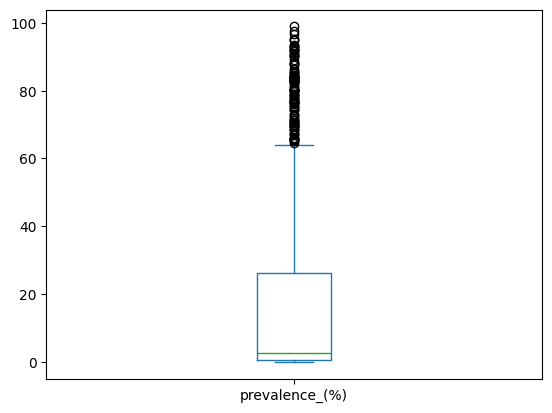

In [29]:
df_drugs["prevalence_(%)"].plot(kind="box")


Dado que los valores extremos detectados mediante el análisis descriptivo pueden reflejar diferencias reales entre países, sustancias(sobre todo por el alcohol que está más normalizado) o periodos de recuerdo, se ha optado por conservarlos en el conjunto de datos y analizarlos de forma contextualizada en etapas posteriores del proyecto.

# 5. Eliminación de columnas innecesarias

In [22]:
df_drugs = df_drugs.drop(columns=["country_code"])

Se ha eliminado la variable country_code, ya que resulta redundante respecto a la variable country y no aporta información adicional relevante para los objetivos del análisis. El resto de variables se mantienen al considerarse pertinentes para el estudio planteado.

# 6. Estandarización o normalización si aplica
En nuestro caso no aplica

# 7. Creación de nuevas variables

Voy a crear una nueva variable que indique la desigualdad entre sexos en una sola variable, así facilita las comparaciones entre países, años o sustancias

In [23]:
df_drugs["gender_gap"] = (df_drugs["males_(%)"] - df_drugs["females_(%)"])


# 8. Guardado del conjunto de datos con columnas eliminadas, nuevas creadas, con NA y sin NA en dos dataframes distintos. Mantenemos outliers pues así lo hemos considerado

In [30]:
df_drugs.to_csv("../data/data_clean/drugs.csv")

In [31]:
df_drugs_no_na = df_drugs.dropna()
df_drugs_no_na.to_csv("../data/data_clean/drugs_no_na.csv")